# Estadística descriptiva e inferencial con Pingouin y Statsmodels

Este tutorial es una adaptación al español de los materiales del curso [Quantitative Neuroscience](http://www.compneurosci.com/NSCI801.html) desarrollado por Gunnar Blohm y Joe Nashed en la [Universidad de Queens](https://www.queensu.ca/). 

También incluye fragmentos de los tutoriales [Python Statistics Fundamentals: How to Describe Your Data](https://realpython.com/python-statistics/#summary-of-descriptive-statistics) y [NumPy, SciPy, and Pandas: Correlation With Python](https://realpython.com/numpy-scipy-pandas-correlation-python/#linear-correlation)
desarrollados por Mirko Stojiljković en el portal Real Python.

Para este tutorial es necesario instalar el paquete de estadística `Pingouin`:

In [2]:
#!pip install pingouin

## Estadística descriptiva

Todas las estadísticas descriptivas son medidas de tendencia central o medidas de variabilidad, también conocidas como medidas de dispersión. 

Las medidas de tendencia central se centran en los promedios o valores medios de los conjuntos de datos; mientras que las medidas de variabilidad se centran en la dispersión de los datos. 

Estas dos medidas utilizan gráficos, tablas y discusiones generales para ayudar a las personas a comprender el significado de los datos analizados.

### Resumen global de medidas estadísticas

Pandas ofrece rutinas útiles para obtener rápidamente estadísticas descriptivas con una sola función o llamada a un método. 

Puedes usar `describe()` así:

In [1]:
import pandas as pd

sw = pd.read_csv(
    "https://raw.githubusercontent.com/gastonstat/matrix4sl/master/data/starwars.csv"
)
sw.head()

,name,gender,height,weight,eyecolor,haircolor,skincolor,homeland,born,died,jedi,species,weapon
0,Anakin Skywalker,male,1.88,84.0,blue,blond,fair,Tatooine,41.9BBY,4ABY,yes_jedi,human,lightsaber
1,Padme Amidala,female,1.65,45.0,brown,brown,light,Naboo,46BBY,19BBY,no_jedi,human,unarmed
2,Luke Skywalker,male,1.72,77.0,blue,blond,fair,Tatooine,19BBY,unk_died,yes_jedi,human,lightsaber
3,Leia Organa,female,1.50,49.0,brown,brown,light,Alderaan,19BBY,unk_died,no_jedi,human,blaster
4,Qui-Gon Jinn,male,1.93,88.5,blue,brown,light,unk_planet,92BBY,32BBY,yes_jedi,human,lightsaber


In [3]:
sw.describe()

,height,weight
count,20.000000,19.000000
mean,1.789000,74.868421
std,0.632405,30.112678
min,0.660000,17.000000
25%,1.665000,62.500000
50%,1.790000,78.000000
75%,1.892500,82.000000
max,3.900000,159.000000


Este método devuelve un nuevo DataFrame que contiene lo siguiente:

- count: la cantidad de elementos en su conjunto de datos
- mean: la media de su conjunto de datos
- std: la desviación estándar de su conjunto de datos
- min y max: los valores mínimo y máximo de su conjunto de datos
- 25%, 50% y 75%: los cuartiles de su conjunto de datos

Si deseas que el objeto Serie resultante contenga otros percentiles, debes especificar el valor de los percentiles de los parámetros opcionales.

Puedes calcular cada resultado por separado llamando a los métodos específicos:

In [4]:
sw.count()

name         20
gender       20
height       20
weight       19
eyecolor     18
haircolor    18
skincolor    17
homeland     20
born         20
died         20
jedi         20
species      20
weapon       20
dtype: int64

In [42]:
sw.value_counts(subset=["gender"], normalize=True)

gender
male      0.9
female    0.1
Name: proportion, dtype: float64

In [6]:
sw.mean(numeric_only=True)

height     1.789000
weight    74.868421
dtype: float64

In [7]:
sw.std(numeric_only=True)

height     0.632405
weight    30.112678
dtype: float64

In [12]:
sw.min(numeric_only=True)

height     0.66
weight    17.00
dtype: float64

In [8]:
sw.max(numeric_only=True)

height      3.9
weight    159.0
dtype: float64

In [12]:
sw.quantile(0.25, numeric_only=True)

height     1.665
weight    62.500
Name: 0.25, dtype: float64

In [9]:
sw.quantile(0.75, numeric_only=True)

height     1.8925
weight    82.0000
Name: 0.75, dtype: float64

### Forma de la distribución

La asimetría es un parámetro para medir la simetría de un conjunto de datos y la curtosis para medir qué tan pesadas son sus colas en comparación con una distribución normal.

Veámoslo en nuestro ejemplo:

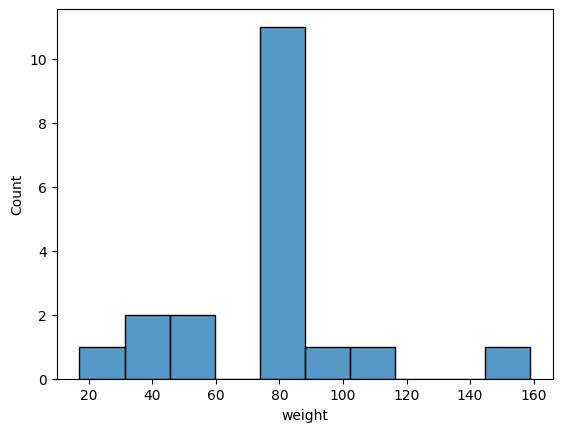

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x="weight", data=sw)
plt.show()

In [14]:
print("skew:", sw["weight"].skew())
print("kurtosis:", sw["weight"].kurtosis())

skew: 0.7274902112518916
kurtosis: 2.871429772733397


In [15]:
sw.skew(numeric_only=True)

height    1.631045
weight    0.727490
dtype: float64

In [16]:
sw.kurtosis(numeric_only=True)

height    6.590584
weight    2.871430
dtype: float64

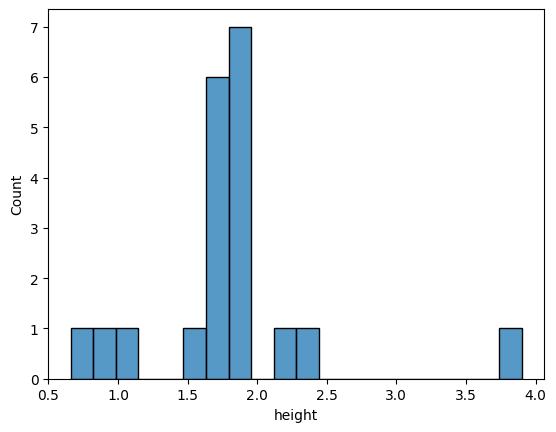

In [17]:
sns.histplot(x="height", data=sw)
plt.show()

In [18]:
print("skew:", sw["height"].skew())
print("kurtosis:", sw["height"].kurtosis())

skew: 1.6310448597414178
kurtosis: 6.5905839871644964


También podemos armar un reporte integrado:

In [21]:
skew = sw.skew(numeric_only=True)
skew.name = "skew"

kurt = sw.kurtosis(numeric_only=True)
kurt.name = "kurtosis"

iqr = sw.quantile(0.75, numeric_only=True) - sw.quantile(
    0.25, numeric_only=True
)
iqr.name = "IQR"

var = sw.std(numeric_only=True) ** 2
var.name = "var"

extra = pd.DataFrame([var, iqr, skew, kurt])

pd.concat([sw.describe(), extra])

,height,weight
count,20.000000,19.000000
mean,1.789000,74.868421
std,0.632405,30.112678
min,0.660000,17.000000
25%,1.665000,62.500000
50%,1.790000,78.000000
75%,1.892500,82.000000
max,3.900000,159.000000
var,0.399936,906.773392
IQR,0.227500,19.500000


## Análisis de correlación 

La correlación está estrechamente relacionada con otras cantidades estadísticas como la media, la desviación estándar, la varianza y la covarianza. 

Hay varias estadísticas que puedes utilizar para cuantificar la correlación. En esta sección, aprenderás acerca de tres coeficientes de correlación:

- R de Pearson
- Rho de Spearman
- Tau de Kendall

El coeficiente de Pearson mide la correlación lineal, mientras que los coeficientes de Spearman y Kendall comparan los rankings de datos. Hay métodos de Pandas que pueden utilizar para calcular estos coeficientes. También puedes utilizar Seaborn para ilustrar convenientemente los resultados.

En Pandas puedes llamar al método `.corr()` presente en los objetos de tipo Series o DataFrame. 

>**Nota:** Cuando trabajes con instancias de DataFrame, debes tener en cuenta que las filas son observaciones y las columnas son características o variables.

In [22]:
corr_matrix = sw.corr(numeric_only=True)
corr_matrix

,height,weight
height,1.000000,0.853301
weight,0.853301,1.000000


La matriz de correlación resultante es una nueva instancia de DataFrame y contiene los coeficientes de correlación para las columnas `sw['height']` y `sw['weight']`. Estos resultados etiquetados suelen ser muy convenientes para trabajar porque puedes acceder a ellos con sus etiquetas o sus índices de posición:

In [23]:
print(corr_matrix.at["height", "weight"])
print(corr_matrix.iat[0, 1])

0.8533009433159517
0.8533009433159517


Este ejemplo muestra dos formas de acceder a los valores:

- Utiliza `.at[]` para acceder a un solo valor por sus etiquetas de fila y columna.
- Utiliza `.iat[]` para acceder a un valor por sus posiciones de su fila y columna.

O de manera más sencilla:

In [34]:
print(corr_matrix["height"])

height    1.000000
weight    0.853301
Name: height, dtype: float64


In [35]:
print(corr_matrix["weight"])

height    0.853301
weight    1.000000
Name: weight, dtype: float64


Puedes usar `.corr()` para calcular los tres coeficientes de correlación:

- 'pearson'
- 'spearman'
- 'kendall'

In [37]:
pearson_corr_matrix = sw.corr(method="pearson", numeric_only=True)
pearson_corr_matrix

,height,weight
height,1.000000,0.853301
weight,0.853301,1.000000


In [38]:
spearman_corr_matrix = sw.corr(method="spearman", numeric_only=True)
spearman_corr_matrix

,height,weight
height,1.000000,0.936236
weight,0.936236,1.000000


In [39]:
kendall_corr_matrix = sw.corr(method="kendall", numeric_only=True)
kendall_corr_matrix

,height,weight
height,1.000000,0.815491
weight,0.815491,1.000000




Puedes aplicar `.corr()` de la misma manera con los objetos DataFrame que contienen tres o más columnas:

In [24]:
davis_data = pd.read_csv(
    "https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/datasets/Davis.txt",
    sep=r"\s{1,}",
    engine="python",
)
davis_data.head()

,sex,weight,height,reportedWeight,reportedHeight
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [25]:
davis_data.corr(numeric_only=True)

,weight,height,reportedWeight,reportedHeight
weight,1.000000,0.189650,0.835841,0.636326
height,0.189650,1.000000,0.603269,0.744637
reportedWeight,0.835841,0.603269,1.000000,0.761860
reportedHeight,0.636326,0.744637,0.761860,1.000000


### Mapas de calor de matrices de correlación

¡La matriz de correlación puede volverse realmente grande y confusa cuando tiene muchas funciones! Afortunadamente, puedes presentarlo visualmente como un mapa de calor donde cada campo tiene el color que corresponde a su valor.

Para realizarlo, nos apoyaremos en la función `heatmap` presente en el paquete seaborn:

<Axes: >

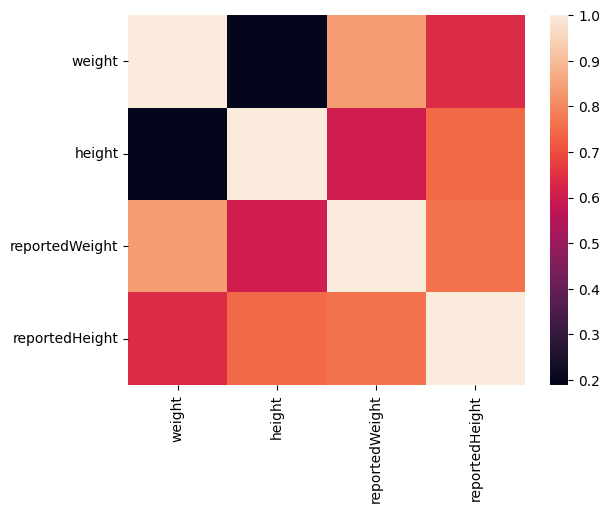

In [26]:
import seaborn as sns

sns.heatmap(davis_data.corr(numeric_only=True))

## Estadística Inferencial

### Comparación de grupos

Cuando queremos comparar grupos o condiciones experimentales recurrimos a métodos de comparación de distribuciones. Estos pueden estar basados en las medias (pruebas paramétricas) o en el orden de los datos (pruebas no paramétricas).

### Análisis de normalidad

Un procedimiento común para elegir entre ambas consiste en verificar la normalidad de las distribuciones a analizar. 

Para ello existen métodos gráficos e inferenciales.

En Python podemos generar la gráfica de probabilidad normal con la función `qqplot` disponible en el paquete `pingouin`:

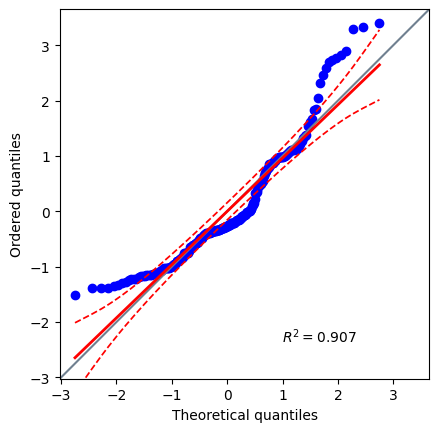

In [44]:
import pingouin as pg
import pandas as pd

df_subsdis = pd.read_csv(
    "https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCuantitativos/depression-data-subsdis.csv"
)

pg.qqplot(df_subsdis["schizophrenia"], dist="norm");

En este gráfico se aprecia que la línea azul que representa a los datos presenta curvaturas. Esto sugiere una desviación respecto a la distribución normal. 

Las **pruebas inferenciales** específicas de normalidad también están disponibles en todos los programas estadísticos. Los dos más comunes son la prueba de Shapiro-Wilks y una modificación de la prueba de Kolmogorov-Smirnov. Cada uno **calcula el nivel de significancia para las diferencias en relación a una distribución normal**. 

En nuestro ejemplo, veamos a continuación el resultado de una prueba de Shapiro-Wilks:

In [45]:
pg.normality(df_subsdis["schizophrenia"], method="shapiro")

,W,pval,normal
schizophrenia,0.90627,7.514724e-11,False


### Análisis de heterocedasticidad

En el caso de las pruebas paramétricas, también suele interesarnos si las varianzas entre las distribuciones a analizar son homogéneas o no. 

Para este procedimiento, también podemos aplicar métodos gráficos e inferenciales.

Veámoslo en nuestro ejemplo:

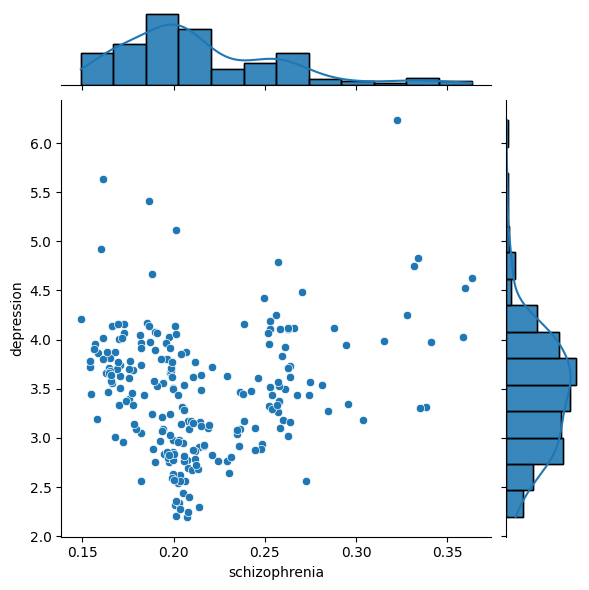

In [46]:
import seaborn as sns

ax = sns.jointplot(x="schizophrenia", y="depression", data=df_subsdis)
ax.plot_marginals(sns.histplot, kde=True);

Podemos apreciar que para los diferentes valores de la variable `depression` existen diferentes patrones de dispersion para la variable `schizophrenia`. 

Las **pruebas inferenciales** para la dispersión igual de varianza **evalúan la igualdad de varianzas dentro de grupos formados por variables categóricas**. 

La prueba más común, la prueba de **Levene**, se usa para evaluar si las varianzas de una sola variable métrica son iguales en cualquier número de grupos. 

Apliquemos la prueba de Levene en nuestro ejemplo:

In [47]:
pg.homoscedasticity(df_subsdis[["depression", "schizophrenia"]])

,W,pval,equal_var
levene,321.241223,7.172701e-55,False


### Prueba t de student

El procedimiento más común para comparar distribuciones consiste en aplicar la prueba paramétrica t de student. 

En Python podemos emplear la función `ttest` disponible en el paquete `pingouin`:

In [52]:
pg.ttest(
    df_subsdis["depression"],
    df_subsdis["schizophrenia"],
    paired=False,
    alternative="two-sided",
    correction=True,
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,77.874635,232.209015,two-sided,2.098744e-168,"[3.16, 3.32]",7.246112,3.046e+262,1.0


Esta función nos permite aplicar la prueba t para muestras independientes o relacionadas manipulando el argumento `paired`. Además, podemos especificar si queremos la prueba de Welch con el argumento `correction`.

#### Alternativas no paramétricas: Mann-Whitney y Wilcoxon

En caso sea necesario basar nuestro análisis en técnicas no paramétricas, podemos optar por la prueba U de Mann-Whitney (muestras independientes) o la prueba de Wilcoxon (muestras relacionadas).

En `pingouin` encontramos funciones dedicadas para estas pruebas:

In [53]:
pg.mwu(df_subsdis["depression"], df_subsdis["schizophrenia"])

,U-val,alternative,p-val,RBC,CLES
MWU,53361.0,two-sided,3.590233e-77,-1.0,1.0


In [54]:
pg.wilcoxon(df_subsdis["depression"], df_subsdis["schizophrenia"])

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,1.203607e-39,1.0,1.0


### ANOVA

El análisis de varianza (ANOVA) se puede considerar como una extensión de la prueba t. La prueba t independiente se utiliza para comparar las medias de una condición entre 2 grupos. ANOVA se usa cuando se quiere comparar las medias de una condición entre más de 2 grupos. 

En `pingouin` contamos con una función dedicada para este análisis:

In [55]:
df = pg.read_dataset("anova")
df

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48
5,6,Dark Blond,63
6,7,Dark Blond,57
7,8,Dark Blond,52
8,9,Dark Blond,41
9,10,Dark Blond,43


In [58]:
pg.anova(dv="Pain threshold", between="Hair color", data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,Hair color,3,15,6.791407,0.004114,0.575962


In [64]:
pg.pairwise_tests(
    dv="Pain threshold",
    between="Hair color",
    subject="Subject",
    effsize="Cohen",
    padjust="Bonferroni",
    data=df,
)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,Cohen
0,Hair color,Dark Blond,Dark Brunette,False,True,2.474565,8.000000,two-sided,0.038436,0.230616,Bonferroni,2.183,1.565052
1,Hair color,Dark Blond,Light Blond,False,True,-1.419100,8.000000,two-sided,0.193635,1.000000,Bonferroni,0.875,-0.897518
2,Hair color,Dark Blond,Light Brunette,False,True,1.752072,6.562510,two-sided,0.126065,0.756393,Bonferroni,1.133,1.105156
3,Hair color,Dark Brunette,Light Blond,False,True,-4.090697,8.000000,two-sided,0.003482,0.020893,Bonferroni,10.877,-2.587184
4,Hair color,Dark Brunette,Light Brunette,False,True,-1.105652,6.821772,two-sided,0.306339,1.000000,Bonferroni,0.723,-0.705115
5,Hair color,Light Blond,Light Brunette,False,True,3.563964,6.772089,two-sided,0.009690,0.058142,Bonferroni,5.498,2.267190


En caso de Anova de dos vías o más seguir empleando esta función:

In [66]:
df_2way = pd.read_csv(
    "https://raw.githubusercontent.com/BlohmLab/NSCI801-QuantNeuro/master/Figures/rmAOV2way.csv"
)
df_2way

,Sub_id,rt,iv1,iv2
0,1,1082.986553,noise,down
1,2,938.799689,noise,down
2,3,1101.470970,noise,down
3,4,1123.030275,noise,down
4,5,938.051589,noise,down
...,...,...,...,...
355,56,683.514099,quiet,middle
356,57,781.766827,quiet,middle
357,58,632.937575,quiet,middle
358,59,774.468696,quiet,middle


In [67]:
pg.anova(dv="rt", between=["iv1", "iv2"], data=df_2way)

,Source,SS,DF,MS,F,p-unc,np2
0,iv1,2.418569e+07,1,2.418569e+07,2398.303385,1.009670e-159,0.871380
1,iv2,4.836439e+06,2,2.418219e+06,239.795690,1.461700e-66,0.575332
2,iv1 * iv2,3.924650e+04,2,1.962325e+04,1.945883,1.443861e-01,0.010874
3,Residual,3.569913e+06,354,1.008450e+04,NaN,NaN,NaN


En caso de Anova de medidas repetidas podemos emplear la función `rm_anova`:

In [68]:
df_repeated = pd.read_csv(
    "https://raw.githubusercontent.com/BlohmLab/NSCI801-QuantNeuro/master/Figures/rmAOV1way.csv"
)

df_repeated

,Sub_id,rt,cond
0,1,971.826563,noise
1,2,857.608167,noise
2,3,1035.354758,noise
3,4,867.620871,noise
4,5,928.381831,noise
...,...,...,...
115,56,562.575663,quiet
116,57,672.512938,quiet
117,58,583.308165,quiet
118,59,762.600382,quiet


In [70]:
pg.rm_anova(dv="rt", within="cond", subject="Sub_id", data=df_repeated)

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,cond,1,59,499.154857,1.774052e-30,0.771358,1.0


Al igual que en el caso anterior, puedes colocar una lista en el argumento `within` para optar por una prueba N-way de medidas repetidas. 

#### Alternativas no paramétricas: Kruskal-Wallis y Friedman

En caso sea necesario basar nuestro análisis en técnicas no paramétricas, podemos optar por la prueba H de Kruskal-Wallis (muestras independientes) o la prueba de Friedman (muestras relacionadas).

En `pingouin` encontramos funciones dedicadas para estas pruebas:

In [71]:
pg.kruskal(dv="Pain threshold", between="Hair color", data=df)

,Source,ddof1,H,p-unc
Kruskal,Hair color,3,10.58863,0.014172


In [72]:
pg.friedman(dv="rt", within="cond", subject="Sub_id", data=df_repeated)

,Source,W,ddof1,Q,p-unc
Friedman,cond,1.0,1,60.0,9.485738e-15


### Análisis de correlación

Podemos emplear `pingouin` para obtener los resultados inferenciales de nuestros análisis de correlación:

In [73]:
davis_data = pd.read_csv(
    "https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/datasets/Davis.txt",
    sep=r"\s{1,}",
    engine="python",
)
davis_data.drop(columns="sex", inplace=True)
davis_data.head()

,weight,height,reportedWeight,reportedHeight
1,77,182,77.0,180.0
2,58,161,51.0,159.0
3,53,161,54.0,158.0
4,68,177,70.0,175.0
5,59,157,59.0,155.0


In [74]:
davis_data.corr()

,weight,height,reportedWeight,reportedHeight
weight,1.000000,0.189650,0.835841,0.636326
height,0.189650,1.000000,0.603269,0.744637
reportedWeight,0.835841,0.603269,1.000000,0.761860
reportedHeight,0.636326,0.744637,0.761860,1.000000


In [78]:
davis_data.rcorr(method="spearman")

/home/renato/.virtualenvs/python/lib/python3.10/site-packages/pingouin/correlation.py:1111: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


,weight,height,reportedWeight,reportedHeight
weight,-,***,***,***
height,0.768,-,***,***
reportedWeight,0.962,0.81,-,***
reportedHeight,0.766,0.976,0.793,-


In [76]:
pg.pairwise_corr(davis_data, method="kendall", padjust="bonferroni")

,X,Y,method,alternative,n,r,CI95%,p-unc,p-corr,p-adjust,power
0,weight,height,kendall,two-sided,200,0.598513,"[0.5, 0.68]",1.288739e-34,7.732434e-34,bonferroni,1.0
1,weight,reportedWeight,kendall,two-sided,183,0.891896,"[0.86, 0.92]",9.751648e-69,5.850989e-68,bonferroni,1.0
2,weight,reportedHeight,kendall,two-sided,183,0.596332,"[0.49, 0.68]",7.849151e-31,4.709491e-30,bonferroni,1.0
3,height,reportedWeight,kendall,two-sided,183,0.632249,"[0.54, 0.71]",3.579063e-35,2.147438e-34,bonferroni,1.0
4,height,reportedHeight,kendall,two-sided,183,0.900867,"[0.87, 0.93]",1.120504e-67,6.723026e-67,bonferroni,1.0
5,reportedWeight,reportedHeight,kendall,two-sided,181,0.622827,"[0.52, 0.7]",4.614714e-33,2.768829e-32,bonferroni,1.0


## Análisis de regresión múltiple

In [82]:
df = pd.read_csv(
    "https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/datasets/Ginzberg.txt",
    sep=r"\s{1,}",
    engine="python",
)
ginzberg_data = df.drop(columns=["simplicity", "fatalism", "depression"])
ginzberg_data.rename(
    columns={
        "adjsimplicity": "simplicity",
        "adjfatalism": "fatalism",
        "adjdepression": "depression",
    },
    inplace=True,
)
ginzberg_data

,simplicity,fatalism,depression
1,0.75934,0.10673,0.41865
2,0.72717,0.99915,0.51688
3,0.62176,0.03811,0.70699
4,0.83522,0.42218,0.65639
5,0.47697,0.81423,0.53518
...,...,...,...
78,0.72117,1.50039,1.14913
79,1.59752,2.05016,1.16443
80,2.39515,0.88910,2.24452
81,1.31493,1.04058,1.37153


In [84]:
import statsmodels.formula.api as smf

# Fit regression model
model = smf.ols("depression ~ fatalism + simplicity", data=ginzberg_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             depression   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     22.76
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           1.10e-10
Time:                        09:29:12   Log-Likelihood:                -33.232
No. Observations:                  82   AIC:                             74.46
Df Residuals:                      78   BIC:                             84.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.1366      0.202     -0.676      0.501      -0.539       0.266
fatalism                0.7218      0.181      3.987      0.000       0.361       1.082
simplicity              0.7736      0.208      3.714      0.000       0.359       1.188
fatalism:simplicity    -0.3168      0.143     -2.216      0.030      -0.601      -0.032
==============================================================================
Omnibus:                       11.877   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.308
Skew:                           0.853   Prob(JB):                      0.00213
Kurtosis:                       3.831   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Análisis de regresión logística

In [85]:
df = pd.read_csv(
    "https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/datasets/Cowles.txt",
    sep=r"\s{1,}",
    engine="python",
)
df.dropna(inplace=True)
cowles_data = pd.get_dummies(df, drop_first=True, dtype=int)
cowles_data["neuroticism"] = cowles_data["neuroticism"] + 1
cowles_data

,neuroticism,extraversion,sex_male,volunteer_yes
1,17.0,13.0,0,0
2,9.0,14.0,1,0
3,6.0,16.0,1,0
4,9.0,20.0,0,0
5,10.0,19.0,1,0
...,...,...,...,...
1417,6.0,10.0,1,1
1418,9.0,4.0,0,1
1419,9.0,8.0,1,1
1420,20.0,20.0,0,1


In [86]:
import statsmodels.formula.api as smf

model = smf.logit(
    "volunteer_yes ~ extraversion + neuroticism + sex_male", data=cowles_data
).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.670676
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          volunteer_yes   No. Observations:                 1421
Model:                          Logit   Df Residuals:                     1417
Method:                           MLE   Df Model:                            3
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                 0.01419
Time:                        09:31:21   Log-Likelihood:                -953.03
converged:                       True   LL-Null:                       -966.75
Covariance Type:            nonrobust   LLR p-value:                 4.750e-06
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.1229      0.256     -4.378      0.000      -1.625      -0.620
extraversion     0.0663      0.014      4.651      0.000       0.038       0.094
neuroticism      0.0064      0.011      0.560      0.575      -0.016       0.029
sex_male        -0.2352      0.111     -2.115      0.034      -0.453      -0.017
================================================================================
"""